In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv(r"D:\overall_practice_Files\Csv_files\placement.csv")

In [5]:
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [9]:
df.head

<bound method NDFrame.head of     cgpa  resume_score  placed
0   8.14          6.52       1
1   6.17          5.17       0
2   8.27          8.86       1
3   6.88          7.27       1
4   7.52          7.30       1
..   ...           ...     ...
95  6.33          6.38       0
96  8.23          7.76       1
97  6.65          7.78       0
98  8.14          5.63       1
99  6.09          6.61       0

[100 rows x 3 columns]>

In [11]:
df.shape

(100, 3)

<Axes: xlabel='cgpa', ylabel='resume_score'>

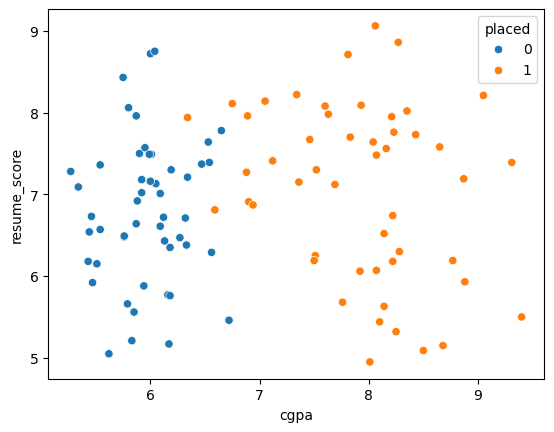

In [21]:
sns.scatterplot(x = df['cgpa'],y = df['resume_score'],hue=df['placed'])


In [41]:
X = df.iloc[:,0:2]
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [43]:
y = df.iloc[:,-1]
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [51]:
from sklearn.linear_model import Perceptron
p = Perceptron()


In [53]:
p.fit(X,y)

Perceptron()

In [55]:
p.coef_

array([[ 40.26, -36.  ]])

In [61]:
p.intercept_

array([-25.])

In [65]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 165.2 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.4 MB 165.2 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.4 MB 262.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 353.1 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.4 MB 656.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 850.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 965.4 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 2.8 MB/s eta 0:00:01
   ----------------

In [67]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

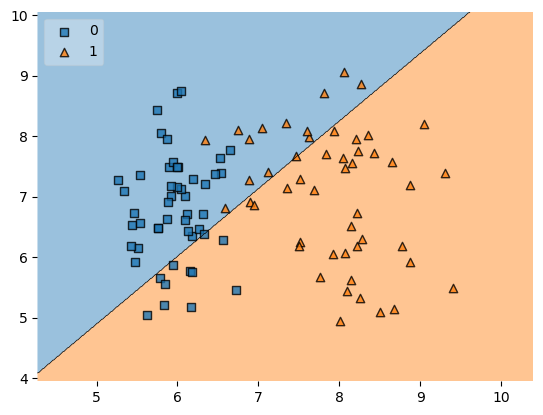

In [70]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)


# Now we are using percepton trik and creating new classification data

In [96]:
import numpy as np
from sklearn.datasets import  make_classification

In [100]:
X, y = make_classification(n_samples=100, n_features=2, n_informative = 1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

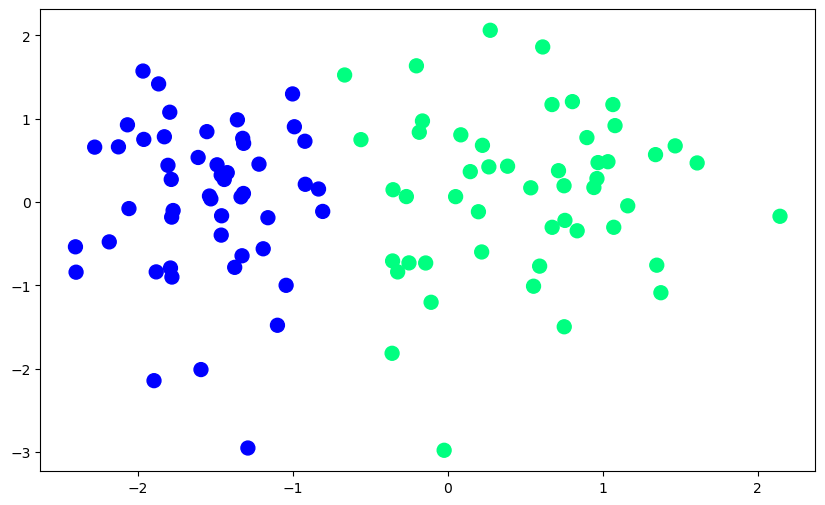

In [108]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s = 100)

In [168]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)      
        y_hat = step(np.dot(X[j],weights))  
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [170]:
np.dot(np.insert(X[41],0,1),[1,1,1])

0.2946000908036749

In [172]:
def step(z):
    return 1 if z>0 else 0

In [175]:
intercept_,coef_ = perceptron(X,y)

In [177]:
from sklearn.linear_model import Perceptron

In [179]:
print(coef_)
print(intercept_)

[1.37023778 0.11558646]
1.0


In [181]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [183]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

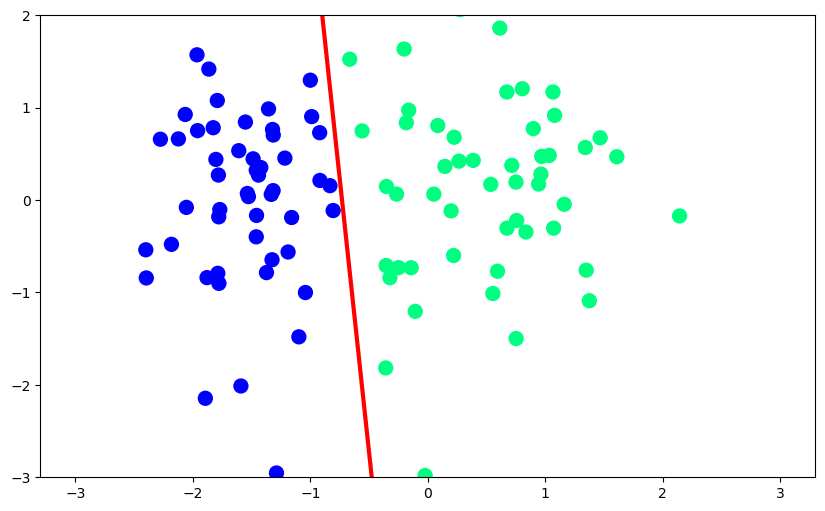

In [185]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)